In [207]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#import the data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# explore the data

In [208]:
print("Shape of training data:")
print(x_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(x_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


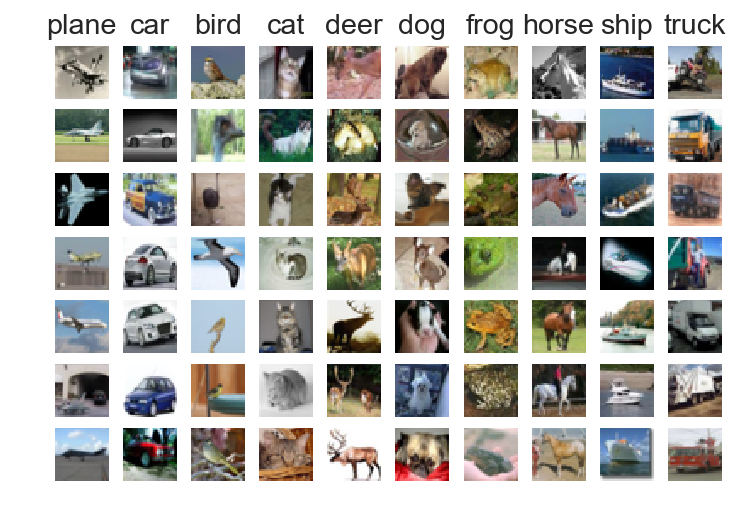

In [209]:
import numpy as np
import matplotlib.pyplot as plt
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# Pre-processing the data

In [166]:
#shuffle the training data
import numpy as np
shuffle_index = np.random.permutation(50000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [195]:
from sklearn.preprocessing import StandardScaler  
x_train =np.reshape(x_train, (50000,3072))
y_train=np.reshape(y_train, (50000,))
x_test =np.reshape(x_test, (10000,3072))
y_test =np.reshape(y_test, (10000,))
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test) 

/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/navya/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Train the model with perceptron classifier

In [196]:
from sklearn.datasets.mldata import fetch_mldata
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

              
ML_model = Perceptron(random_state= 43)
ML_model.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=43,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [198]:
# training accuracy cakculation
score = cross_val_score(ML_model, x_train, y_train, cv= 3)
training_accuracy = score.mean() * 100;
print('Traning Accuracy is = ' + str(training_accuracy) + '%')



Traning Accuracy is = 26.94358127174085%


In [199]:
# Test accuracy calculation
y_pred_test= ML_model.predict(x_test);
test_accuracy = (sum(y_pred_test == y_test)/ len(y_pred_test))*100; 
print('Generalization Accuracy = ' + str(test_accuracy)+ '%');



Generalization Accuracy = 23.78%


In [203]:
#Confusion Matrix 
conf_mat = confusion_matrix(y_test, y_pred_test)
print('---------------Confusion Matrix--------------------')
print(conf_mat)

---------------Confusion Matrix--------------------
[[274  84  55 103  58  76  39 189  86  36]
 [ 90 199 112 117  88  34  55  60 107 138]
 [ 59  24 341 133  68 127  66 127  30  25]
 [ 27  31 255 185  53 174  83  98  47  47]
 [ 38  21 435  69 107 109  64 101  17  39]
 [ 31  18 216 135  46 302  38 120  59  35]
 [ 15  12 344 135  92  93 177  51  39  42]
 [ 44  23 220 152  67  60  49 254  49  82]
 [224  50  60  62  86  65  28  75 302  48]
 [100 112  53 156  59  44  69  65 105 237]]


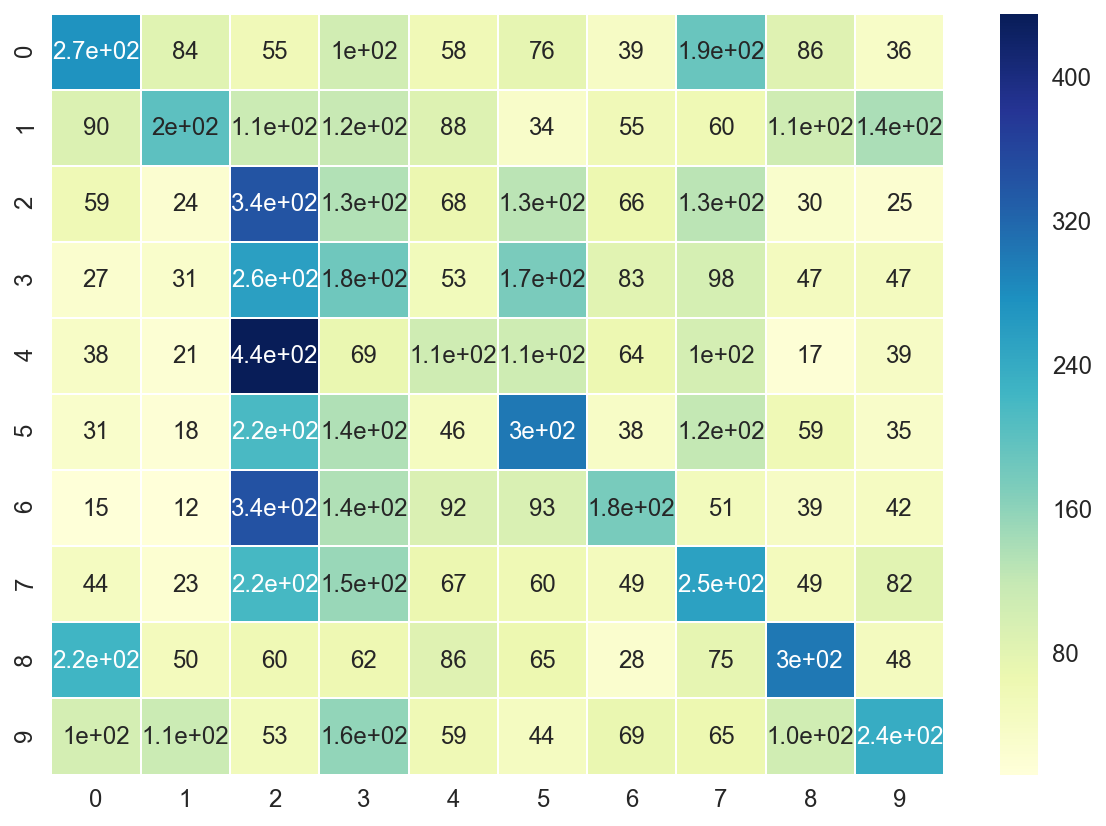

In [205]:
 # visulastaion of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(conf_mat, range(10), range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},linewidths=.5, cmap='YlGnBu')# font size
plt.show()